In [2]:
import xarray as xr

run = 6

In [ ]:
core_profiles = xr.open_dataset(
    f"data/imasdb/aug/3/32408/{run}/core_profiles.h5",
    engine="h5netcdf",
    group="core_profiles",
    phony_dims="access",
)

In [4]:
core_profiles

<xarray.Dataset> Size: 2MB
Dimensions:                                                       (
                                                                   phony_dim_0: 1,
                                                                   phony_dim_1: 120,
                                                                   phony_dim_2: 51,
                                                                   phony_dim_3: 2)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3
Data variables: (12/71)
    ids_properties&creation_date                                  <U8 32B ...
    ids_properties&homogeneous_time                               int32 4B ...
    ids_properties&version_put&access_layer                       <U7 28B ...
    ids_properties&version_put&access_layer_language              <U6 24B ...
    ids_properties&version_put&data_dictionary                    <U6 24B ...
    profiles_1d[]&AOS_SHAPE                                       (phony_dim_0) int32 4B ...
    ...                                                            ...
    profiles_1d[]&t_i_average_SHAPE                               (phony_dim_1, phony_dim_0) int32 480B ...
    profiles_1d[]&zeff                                            (phony_dim_1, phony_dim_2) float64 49kB ...
    profiles_1d[]&zeff_SHAPE                                      (phony_dim_1, phony_dim_0) int32 480B ...
    time                                                          (phony_dim_1) float64 960B ...
    vacuum_toroidal_field&b0                                      (phony_dim_1) float64 960B ...
    vacuum_toroidal_field&r0                                      float64 8B ...

In [5]:
def add_variable_name_as_attribute(dataset: xr.Dataset) -> xr.Dataset:
    """
    Add an attribute to each variable in the dataset containing its name.
    
    Parameters:
    - dataset (xr.Dataset): The input xarray Dataset.
    
    Returns:
    - xr.Dataset: The modified Dataset with the attribute added to each variable.
    """
    for var_name in list(dataset.variables):
        dataset[var_name].attrs['IMAS_NAME'] = var_name
    return dataset

In [6]:
core_profiles = (
    core_profiles.swap_dims(
        {
            core_profiles["time"].dims[0]: "time",
            core_profiles["profiles_1d[]&grid&rho_tor_norm"].dims[-1]: "rho_tor_norm",
            core_profiles["profiles_1d[]&ion[]&label"].dims[-1]: "ion",
        }
    )
    .set_coords(
        [
            "profiles_1d[]&grid&rho_tor_norm",
            "profiles_1d[]&ion[]&label",
        ]
    )
    .squeeze()
    .assign_attrs(
        {
            "creation_date": core_profiles["ids_properties&creation_date"].values,
            "data_dictionary_version": core_profiles["ids_properties&version_put&data_dictionary"].values,
        }
    )
    .drop_vars(
        [
            "ids_properties&creation_date",
            "ids_properties&homogeneous_time",
            "ids_properties&version_put&access_layer",
            "ids_properties&version_put&access_layer_language",
            "ids_properties&version_put&data_dictionary",
            "profiles_1d[]&ion[]&multiple_states_flag",
        ] + [variable for variable in list(core_profiles.variables) if "SHAPE" in variable]
    )
)
core_profiles = (
    add_variable_name_as_attribute(core_profiles)
    .rename_vars(
        {
            "profiles_1d[]&grid&rho_tor_norm": "rho_tor_norm",
            "profiles_1d[]&ion[]&label": "ion",
            'profiles_1d[]&electrons&density': "electron_density",
            'profiles_1d[]&electrons&density_thermal': "electron_density_thermal",
            'profiles_1d[]&electrons&density_thermal_error_lower': "electron_density_thermal_error_lower",
            'profiles_1d[]&electrons&density_thermal_error_upper': "electron_density_thermal_error_upper",
            'profiles_1d[]&electrons&pressure': "electron_pressure",
            'profiles_1d[]&electrons&pressure_thermal': "electron_pressure_thermal",
            'profiles_1d[]&electrons&temperature': "electron_temperature",
            'profiles_1d[]&electrons&temperature_error_lower': "electron_temperature_error_lower",
            'profiles_1d[]&electrons&temperature_error_upper': "electron_temperature_error_upper",
            'profiles_1d[]&grid&area': "area",
            'profiles_1d[]&grid&psi': "psi",
            'profiles_1d[]&grid&rho_tor': "rho_tor",
            'profiles_1d[]&grid&volume': "volume",
            "profiles_1d[]&ion[]&element[]&z_n": "element_nuclear_charge",
            "profiles_1d[]&ion[]&element[]&a": "element_atomic_mass",
            "profiles_1d[]&ion[]&element[]&atoms_n": "atoms_quantity",
            'profiles_1d[]&ion[]&density': "ion_density",
            'profiles_1d[]&ion[]&density_thermal': "ion_density_thermal",
            'profiles_1d[]&ion[]&pressure': "ion_pressure",
            'profiles_1d[]&ion[]&pressure_thermal': "ion_pressure_thermal",
            'profiles_1d[]&ion[]&rotation_frequency_tor': "ion_rotation_frequency_tor",
            'profiles_1d[]&ion[]&rotation_frequency_tor_error_lower': "ion_rotation_frequency_tor_error_lower",
            'profiles_1d[]&ion[]&rotation_frequency_tor_error_upper': "ion_rotation_frequency_tor_error_upper",
            'profiles_1d[]&ion[]&temperature': "ion_temperature",
            'profiles_1d[]&ion[]&temperature_error_lower': "ion_temperature_error_lower",
            'profiles_1d[]&ion[]&temperature_error_upper': "ion_temperature_error_upper",
            'profiles_1d[]&ion[]&z_ion': "ion_z",
            'profiles_1d[]&q': "q",
            'profiles_1d[]&t_i_average': "ion_temperature_average",
            'profiles_1d[]&zeff': "z_effective",
            'vacuum_toroidal_field&b0': "b0",
            'vacuum_toroidal_field&r0': "r0",
        }
    )
)

core_profiles

<xarray.Dataset> Size: 2MB
Dimensions:                                 (time: 120, rho_tor_norm: 51, ion: 2)
Coordinates:
    rho_tor_norm                            (time, rho_tor_norm) float64 49kB ...
    ion                                     (time, ion) <U1 960B ...
  * time                                    (time) float64 960B 2.0 ... 7.95
Data variables: (12/32)
    electron_density                        (time, rho_tor_norm) float64 49kB ...
    electron_density_thermal                (time, rho_tor_norm) float64 49kB ...
    electron_density_thermal_error_lower    (time, rho_tor_norm) float64 49kB ...
    electron_density_thermal_error_upper    (time, rho_tor_norm) float64 49kB ...
    electron_pressure                       (time, rho_tor_norm) float64 49kB ...
    electron_pressure_thermal               (time, rho_tor_norm) float64 49kB ...
    ...                                      ...
    ion_z                                   (time, ion) float64 2kB ...
    q                                       (time, rho_tor_norm) float64 49kB ...
    ion_temperature_average                 (time, rho_tor_norm) float64 49kB ...
    z_effective                             (time, rho_tor_norm) float64 49kB ...
    b0                                      (time) float64 960B ...
    r0                                      float64 8B ...
Attributes:
    creation_date:            29/07/24
    data_dictionary_version:  3.41.0

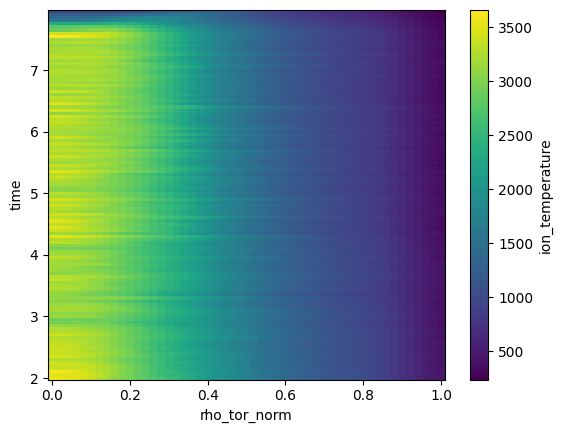

In [15]:
core_profiles.ion_temperature[:, 0, :].plot()

In [16]:
core_profiles.ion.values

array([['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D', 'C'],
       ['D',